In [91]:
# Assignment 2 - 1a

# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
# https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086

import sys
import os
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

LEARNING_RATE = [0.1, 0.01, 0.001]
ACTIVATION_METHOD = ['sigmoid', 'tanh']
LOSS_METHOD = ['categorical_crossentropy', 'mean_squared_error']
MAX_EPOCH = 50

# define cnn model
def define_model(lr, am, lm):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5, 5), activation=am, input_shape=(32,32,3)))
    model.add(AveragePooling2D())
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation=am))
    model.add(AveragePooling2D())
    model.add(Flatten())
    model.add(Dense(units=120, activation=am))
    model.add(Dense(units=84, activation=am))
    model.add(Dense(units=10, activation = 'softmax'))
    # compile model
    opt = SGD(learning_rate=lr, momentum=0.9)
    model.compile(optimizer=opt, loss=lm, metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history, lr, am, lm, acc):
    # list all data in history
    #print(history.history.keys())
    # summarize history for accuracy
    pyplot.plot(history.history['accuracy'])
    pyplot.plot(history.history['val_accuracy'])
    pyplot.title('model accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    # save plot to file
    filename = './content/data/models/' + 'epoch_' + str(MAX_EPOCH) + '-' + str(lr) + '-' + am + '-' + lm + '-' + 'acc_' + acc
    pyplot.savefig(filename + '-accplot.png')
    pyplot.close()
    # summarize history for loss
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    # save plot to file
    pyplot.savefig(filename + '-lossplot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness(lr, am, lm):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model(lr, am, lm)
    # fit model
    history = model.fit(trainX, trainY, epochs=MAX_EPOCH, batch_size=64, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    acc_string = f'{(acc*100.0):.2f}'
    print(f'Accuracy: {acc_string}')
    # save model
    filepath = './models/' + 'epoch_' + str(MAX_EPOCH) + '-' + str(lr) + '-' + am + '-' + lm + '-model'
    model.save(filepath)
    # learning curves
    summarize_diagnostics(history, lr, am, lm, acc_string)
  

# entry point, run the test harness
for rate in LEARNING_RATE:
    for act in ACTIVATION_METHOD:
        for loss in LOSS_METHOD:
            filepath = './models/' + 'epoch_' + str(MAX_EPOCH) + '-' + str(rate) + '-' + act + '-' + loss + '-model'
            print(f'\n\n-Learning Rate:\t{rate}\n-Activation:\t{act}\n-Loss Function:\t{loss}')     
            if os.path.exists(filepath) == False:
                run_test_harness(rate, act, loss)
            else:
                print('Model already created, moving on')



-Learning Rate:	0.1
-Activation:	sigmoid
-Loss Function:	categorical_crossentropy
Model already created, moving on


-Learning Rate:	0.1
-Activation:	sigmoid
-Loss Function:	mean_squared_error
Model already created, moving on


-Learning Rate:	0.1
-Activation:	tanh
-Loss Function:	categorical_crossentropy
Model already created, moving on


-Learning Rate:	0.1
-Activation:	tanh
-Loss Function:	mean_squared_error
Model already created, moving on


-Learning Rate:	0.01
-Activation:	sigmoid
-Loss Function:	categorical_crossentropy
Model already created, moving on


-Learning Rate:	0.01
-Activation:	sigmoid
-Loss Function:	mean_squared_error
Model already created, moving on


-Learning Rate:	0.01
-Activation:	tanh
-Loss Function:	categorical_crossentropy
Model already created, moving on


-Learning Rate:	0.01
-Activation:	tanh
-Loss Function:	mean_squared_error
Model already created, moving on


-Learning Rate:	0.001
-Activation:	sigmoid
-Loss Function:	categorical_crossentropy
Model alre

2022-02-06 20:37:45.155137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


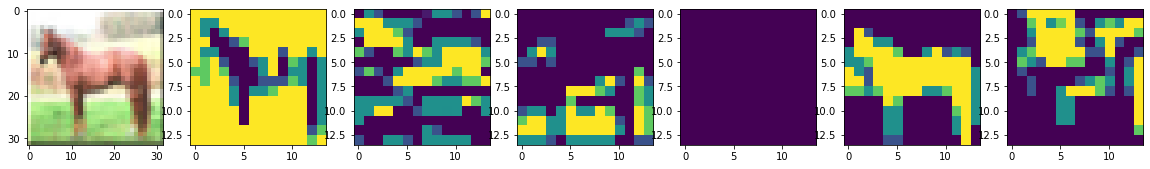

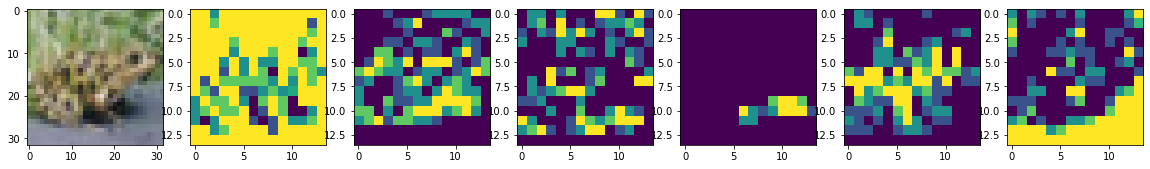

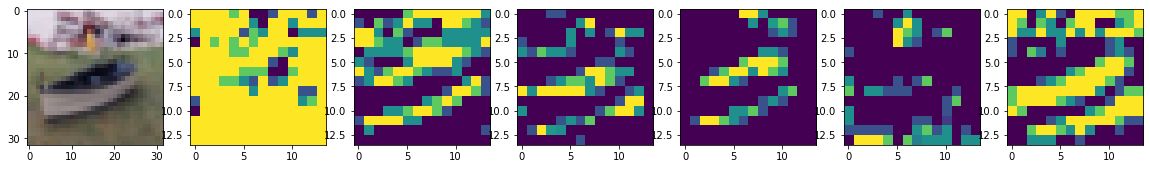

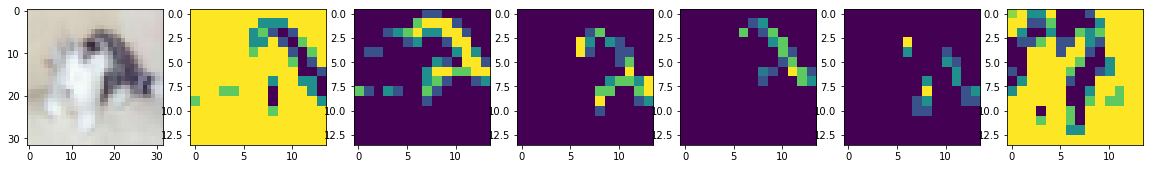

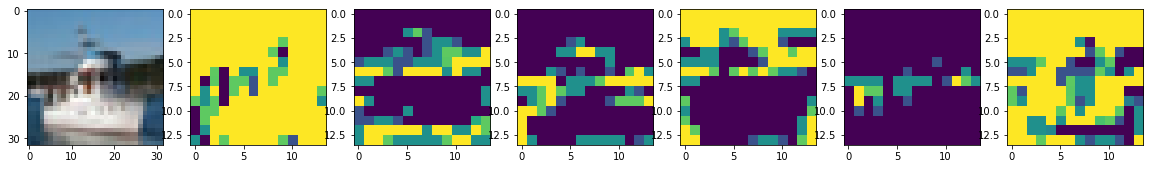

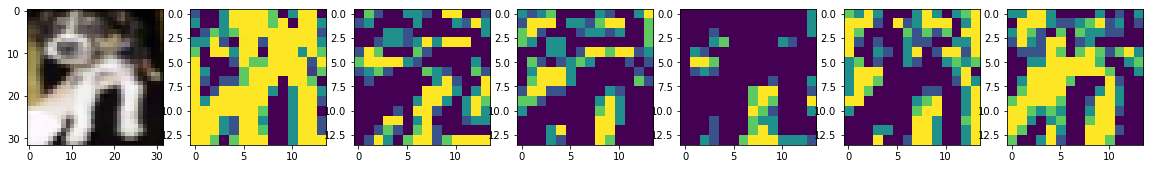

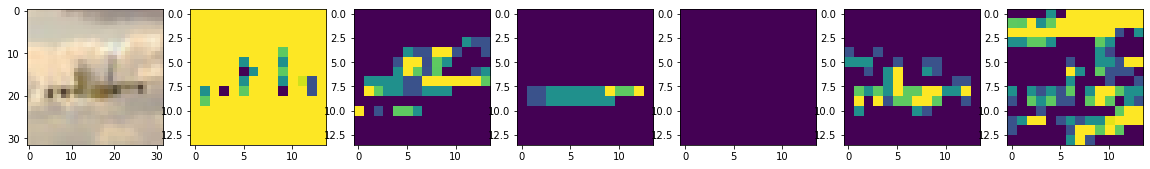

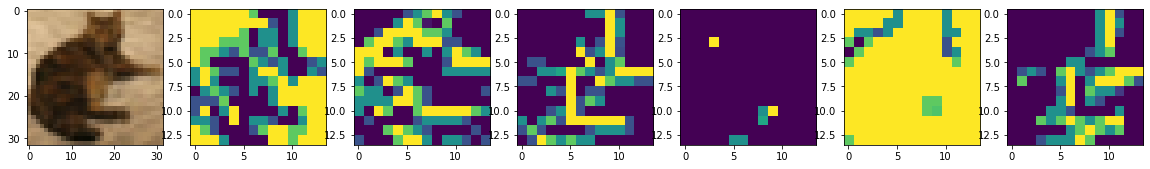

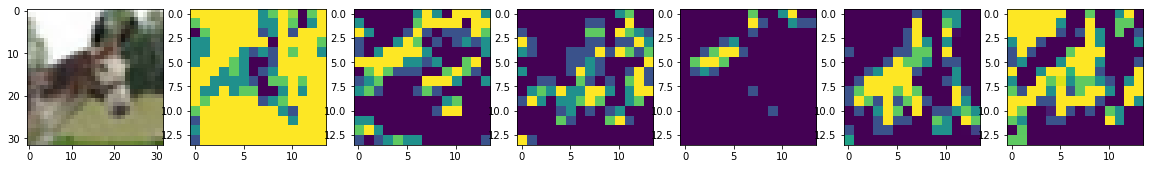

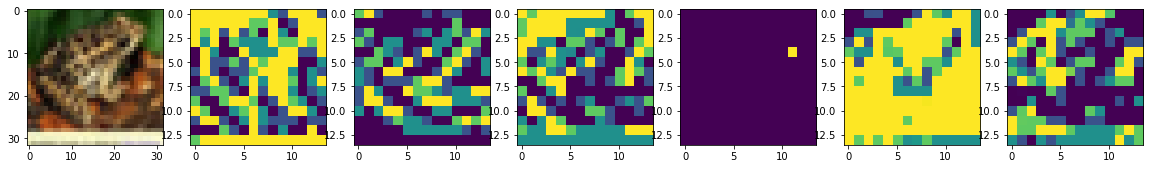

In [90]:
# Assignment 2 - 1b

# https://www.kaggle.com/arpitjain007/guide-to-visualize-filters-and-feature-maps-in-cnn
# visualize convolution layer feature maps

import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

model = keras.models.load_model('./models/epoch_50-0.1-sigmoid-categorical_crossentropy-model')
model = Model(inputs=model.inputs , outputs=model.layers[1].output)

_, _, testX, _ = load_dataset()
images = testX

imageId = np.random.randint(0, len(images), size=10)
# take images for above random image ids
images = images[imageId]

for image in images:
    og_image = image
    # convert the image to an array
    image = img_to_array(image)
    # expand dimensions so that it represents a single 'sample'
    image = expand_dims(image, axis=0)

    #calculating features_map
    features = model.predict(image)


    fig = pyplot.figure(figsize=(20,20))
    pyplot.subplot(1, 7, 1)
    pyplot.imshow(og_image)
    for i in range(1,features.shape[3]+1):
        pyplot.subplot(1, 7, i+1)
        pyplot.imshow(features[0,:,:,i-1])
    
    pyplot.show()

In [93]:
# Assignment 2 - 2a

# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
# https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086

import sys
import os
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

LEARNING_RATE = [0.001]
ACTIVATION_METHOD = ['relu']
LOSS_METHOD = ['categorical_crossentropy']
MAX_EPOCH = 50

# define cnn model
def define_model(lr, am, lm):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(3, 3), activation=am, input_shape=(32,32,3)))
    model.add(AveragePooling2D())
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation=am))
    model.add(AveragePooling2D())
    model.add(Flatten())
    model.add(Dense(units=120, activation=am))
    model.add(Dense(units=84, activation=am))
    model.add(Dense(units=10, activation = 'softmax'))
    # compile model
    opt = SGD(learning_rate=lr, momentum=0.9)
    model.compile(optimizer=opt, loss=lm, metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history, lr, am, lm, acc):
    # list all data in history
    #print(history.history.keys())
    # summarize history for accuracy
    pyplot.plot(history.history['accuracy'])
    pyplot.plot(history.history['val_accuracy'])
    pyplot.title('model accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    # save plot to file
    filename = './models/' + 'epoch_' + str(MAX_EPOCH) + '-' + str(lr) + '-' + am + '-' + lm + '-' + 'acc_' + acc
    pyplot.savefig(filename + '-accplot.png')
    pyplot.close()
    # summarize history for loss
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    # save plot to file
    pyplot.savefig(filename + '-lossplot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness(lr, am, lm):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model(lr, am, lm)
    # fit model
    history = model.fit(trainX, trainY, epochs=MAX_EPOCH, batch_size=64, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    acc_string = f'{(acc*100.0):.2f}'
    print(f'Accuracy: {acc_string}')
    # save model
    filepath = './models/' + 'epoch_' + str(MAX_EPOCH) + '-' + str(lr) + '-' + am + '-' + lm + '-model'
    model.save(filepath)
    # learning curves
    summarize_diagnostics(history, lr, am, lm, acc_string)

# entry point, run the test harness
for rate in LEARNING_RATE:
    for act in ACTIVATION_METHOD:
        for loss in LOSS_METHOD:
            filepath = './models/' + 'epoch_' + str(MAX_EPOCH) + '-' + str(rate) + '-' + act + '-' + loss + '-model'
            print(f'\n\n-Learning Rate:\t{rate}\n-Activation:\t{act}\n-Loss Function:\t{loss}')     
            if os.path.exists(filepath) == False:
                run_test_harness(rate, act, loss)
            else:
                print('Model already created, moving on')



-Learning Rate:	0.001
-Activation:	relu
-Loss Function:	categorical_crossentropy
Epoch 1/50
  6/782 [..............................] - ETA: 8s - loss: 2.2984 - accuracy: 0.1380  

2022-02-06 20:58:40.014873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 2.2317 - accuracy: 0.1599

2022-02-06 20:58:48.590711: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 10s 12ms/step - loss: 2.2317 - accuracy: 0.1599 - val_loss: 2.1154 - val_accuracy: 0.2166
Epoch 2/50
782/782 [==============================] - 8s 11ms/step - loss: 2.0039 - accuracy: 0.2754 - val_loss: 1.9161 - val_accuracy: 0.3015
Epoch 3/50
782/782 [==============================] - 9s 11ms/step - loss: 1.8725 - accuracy: 0.3254 - val_loss: 1.8196 - val_accuracy: 0.3511
Epoch 4/50
782/782 [==============================] - 9s 11ms/step - loss: 1.7834 - accuracy: 0.3615 - val_loss: 1.7425 - val_accuracy: 0.3688
Epoch 5/50
782/782 [==============================] - 8s 11ms/step - loss: 1.7065 - accuracy: 0.3902 - val_loss: 1.6625 - val_accuracy: 0.4036
Epoch 6/50
782/782 [==============================] - 8s 11ms/step - loss: 1.6392 - accuracy: 0.4138 - val_loss: 1.5946 - val_accuracy: 0.4267
Epoch 7/50
782/782 [==============================] - 8s 11ms/step - loss: 1.5685 - accuracy: 0.4373 - val_loss: 1.5191 - val_accuracy: 0.4565
Epoch 8/5

In [96]:
# Assignment 2 - 3

# https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
# https://medium.com/@mgazar/lenet-5-in-9-lines-of-code-using-keras-ac99294c8086

import sys
import os
from matplotlib import pyplot
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD

# load train and test dataset
def load_dataset():
    # load dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()
    # one hot encode target values
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
    # convert from integers to floats
    train_norm = train.astype('float32')
    test_norm = test.astype('float32')
    # normalize to range 0-1
    train_norm = train_norm / 255.0
    test_norm = test_norm / 255.0
    # return normalized images
    return train_norm, test_norm

LEARNING_RATE = [0.001]
ACTIVATION_METHOD = ['relu']
LOSS_METHOD = ['categorical_crossentropy']
MAX_EPOCH = 51

# define cnn model
def define_model(lr, am, lm):
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(3, 3), activation=am, input_shape=(32,32,3), padding='same'))
    model.add(AveragePooling2D(strides=(1, 1)))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation=am, padding='same'))
    model.add(AveragePooling2D(strides=(1, 1)))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation=am, padding='same'))
    model.add(AveragePooling2D(strides=(1, 1)))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation=am, padding='same'))
    model.add(AveragePooling2D(strides=(1, 1)))
    model.add(Conv2D(filters=16, kernel_size=(3, 3), activation=am, padding='same'))
    model.add(AveragePooling2D(strides=(1, 1)))
    model.add(Flatten())
    model.add(Dense(units=120, activation=am))
    model.add(Dense(units=84, activation=am))
    model.add(Dense(units=10, activation = 'softmax'))
    # compile model
    opt = SGD(learning_rate=lr, momentum=0.9)
    model.compile(optimizer=opt, loss=lm, metrics=['accuracy'])
    return model

# plot diagnostic learning curves
def summarize_diagnostics(history, lr, am, lm, acc):
    # list all data in history
    #print(history.history.keys())
    # summarize history for accuracy
    pyplot.plot(history.history['accuracy'])
    pyplot.plot(history.history['val_accuracy'])
    pyplot.title('model accuracy')
    pyplot.ylabel('accuracy')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    # save plot to file
    filename = './models/' + 'epoch_' + str(MAX_EPOCH) + '-' + str(lr) + '-' + am + '-' + lm + '-' + 'acc_' + acc
    pyplot.savefig(filename + '-accplot.png')
    pyplot.close()
    # summarize history for loss
    pyplot.plot(history.history['loss'])
    pyplot.plot(history.history['val_loss'])
    pyplot.title('model loss')
    pyplot.ylabel('loss')
    pyplot.xlabel('epoch')
    pyplot.legend(['train', 'test'], loc='upper left')
    # save plot to file
    pyplot.savefig(filename + '-lossplot.png')
    pyplot.close()

# run the test harness for evaluating a model
def run_test_harness(lr, am, lm):
    # load dataset
    trainX, trainY, testX, testY = load_dataset()
    # prepare pixel data
    trainX, testX = prep_pixels(trainX, testX)
    # define model
    model = define_model(lr, am, lm)
    # fit model
    history = model.fit(trainX, trainY, epochs=MAX_EPOCH, batch_size=64, validation_data=(testX, testY), verbose=1)
    # evaluate model
    _, acc = model.evaluate(testX, testY, verbose=0)
    acc_string = f'{(acc*100.0):.2f}'
    print(f'Accuracy: {acc_string}')
    # save model
    filepath = './models/' + 'epoch_' + str(MAX_EPOCH) + '-' + str(lr) + '-' + am + '-' + lm + '-model'
    model.save(filepath)
    # learning curves
    summarize_diagnostics(history, lr, am, lm, acc_string)
  

# entry point, run the test harness
for rate in LEARNING_RATE:
    for act in ACTIVATION_METHOD:
        for loss in LOSS_METHOD:
            filepath = './models/' + 'epoch_' + str(MAX_EPOCH) + '-' + str(rate) + '-' + act + '-' + loss + '-model'
            print(f'\n\n-Learning Rate:\t{rate}\n-Activation:\t{act}\n-Loss Function:\t{loss}')     
            if os.path.exists(filepath) == False:
                run_test_harness(rate, act, loss)
            else:
                print('Model already created, moving on')



-Learning Rate:	0.001
-Activation:	relu
-Loss Function:	categorical_crossentropy
Epoch 1/51


2022-02-06 21:59:26.977028: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - ETA: 0s - loss: 2.1158 - accuracy: 0.2254

2022-02-06 21:59:40.257524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


782/782 [==============================] - 15s 19ms/step - loss: 2.1158 - accuracy: 0.2254 - val_loss: 1.9458 - val_accuracy: 0.3140
Epoch 2/51
782/782 [==============================] - 14s 18ms/step - loss: 1.8331 - accuracy: 0.3401 - val_loss: 1.7708 - val_accuracy: 0.3683
Epoch 3/51
782/782 [==============================] - 14s 18ms/step - loss: 1.6611 - accuracy: 0.4012 - val_loss: 1.6076 - val_accuracy: 0.4229
Epoch 4/51
782/782 [==============================] - 14s 18ms/step - loss: 1.5584 - accuracy: 0.4404 - val_loss: 1.6880 - val_accuracy: 0.4057
Epoch 5/51
782/782 [==============================] - 14s 18ms/step - loss: 1.4917 - accuracy: 0.4637 - val_loss: 1.4803 - val_accuracy: 0.4680
Epoch 6/51
782/782 [==============================] - 14s 17ms/step - loss: 1.4404 - accuracy: 0.4827 - val_loss: 1.4487 - val_accuracy: 0.4851
Epoch 7/51
782/782 [==============================] - 13s 17ms/step - loss: 1.3900 - accuracy: 0.5011 - val_loss: 1.4055 - val_accuracy: 0.5001
Epo